In [51]:
import matplotlib.pyplot as plt
import math
import time 
import pandas as pd
import numpy as np
from scipy import spatial
from timeit import default_timer as timer
##from docplex.mp.model import Model
#import docplex.mp.solution as Solucion

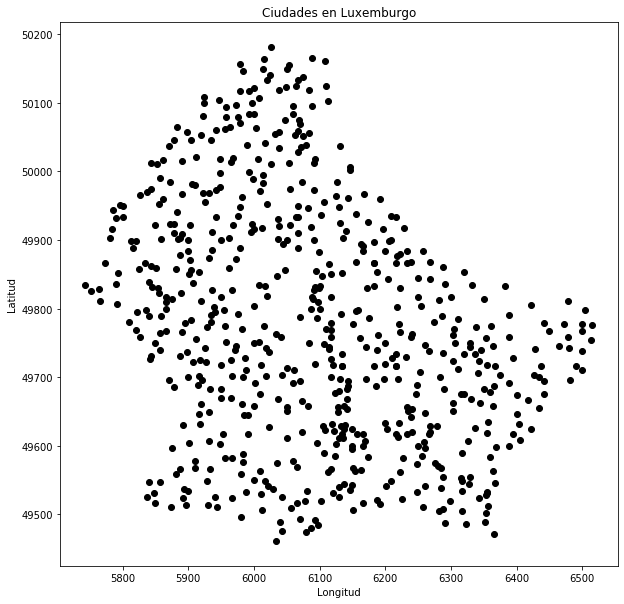

In [24]:
coordenadas=pd.read_csv(r"data.csv") #Importamos el documento que contiene las coordendas de las ciudades
coordenadas.columns=["ciudad", "c_x", "c_y"] #nombres de las columnas del dataframe
coordenadas = coordenadas.drop("ciudad", axis=1)#quitar la columna del número de ciudad
coordenadas = coordenadas.drop_duplicates() #quitamos las ciudades repetidas

ciudades=[i for i in range(len(coordenadas))] #Se crean las 980 ciuades
caminos =[(i,j) for i in ciudades for j in ciudades if i!=j] #todos las uniones posibles entre ciudades



lo=coordenadas["c_x"].tolist() #coordendas de longitud
la=coordenadas["c_y"].tolist() #coordenadas de latitud


plt.figure(figsize=(10,10)) #Grafiquemos las ciudades de Luxemburgo
plt.scatter(la,lo,color='black')
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Ciudades en Luxemburgo")  
plt.show()

matriz_distancias = spatial.distance.cdist(coordenadas, coordenadas, metric='euclidean') #Creamos la matriz de distancias donde la entrada (i,j) es la distancia de la ciudad i a la ciudad j
matriz_distancias =pd.DataFrame(matriz_distancias) #Convertimos en array en un DataFrame
matriz_distancias = matriz_distancias.astype(int) #lo redondeamos

##-------------------------------------------------------------



In [25]:
def ciudades_sin_visitar(sin_visitar):
    for i in sin_visitar:
        if i == 1:
            return True
    return False


def mejor_ruta(ciudades, ruta, min_distancia):
    ruta_mas_corta= ruta[0]
    distancia_mas_corta = min_distancia.item(0)
    for ciudad_inicial in range(0, ciudades):
        if min_distancia[ciudad_inicial] < distancia_mas_corta:
            distancia_mas_corta = min_distancia.item(ciudad_inicial)
            ruta_mas_corta = ruta[ciudad_inicial]

    print("La distancia mínima es de: " + str(distancia_mas_corta))
    print("La ruta más corta es: ")
    print(ruta_mas_corta)

    return distancia_mas_corta, ruta_mas_corta


In [39]:
def algorithm(n):
    ciudades = n #len(matriz_distancias) #número de ciudades que queremos en la ruta
    m = matriz_distancias #renonmbramos para facilitar el algoritmo

    min_distancia = np.zeros((ciudades,), dtype=float)  # distancia mínima del nodo inicial
    ruta = [[0 for i in range(0, ciudades)] for k in range(0, ciudades)]

    # primero seleccionamos la ciuadad inicial
    for ciudad_inicial in range(0, ciudades):
        # Repetir hasta que todas las ciudades se visiten a lo más una vez
        sin_visitar = np.ones((ciudades,), dtype=int)  # ningún nodo se ha visitado
        sin_visitar[ciudad_inicial] = 0
        ruta[ciudad_inicial][0] = ciudad_inicial  # travel route starts with start_node

        ciudad = ciudad_inicial
        it = 1
        while ciudades_sin_visitar(sin_visitar) and it < ciudades:
            # Buscamos todos los caminos (arcos) que salen del la primera ciudad que se visita y van a un nodo no visitado y se elige el más corto
            cercano_cam = float('inf')
            cercano_ciud = ciudades

            for ciudad2 in range(0, ciudades):
                if sin_visitar[ciudad2] == 1 and 0 < m[ciudad][ciudad2] < cercano_cam:
                    cercano_cam =  m[ciudad][ciudad2]
                    cercano_ciud = ciudad2

            if  cercano_ciud >= ciudades:
                min_distancia[ciudad_inicial] = float('inf')
                break

            ciudad =  cercano_ciud
            sin_visitar[ciudad] = 0
            min_distancia[ciudad_inicial] = min_distancia[ciudad_inicial] + cercano_cam
            ruta[ciudad_inicial][it] = ciudad
            it = it + 1

        if not math.isinf(min_distancia[ciudad_inicial]):
            ultima_vis = ruta[ciudad_inicial][ciudades-1]
            if m[ultima_vis][ciudad_inicial] > 0:
                min_distancia[ciudad_inicial] = min_distancia[ciudad_inicial] + m[ultima_vis ][ciudad_inicial]
            else:
                min_distancia[ciudad_inicial] = float('inf')


    [distancia_mas_corta, ruta_mas_corta] = mejor_ruta(ciudades, ruta, min_distancia)

    return distancia_mas_corta, ruta_mas_corta


In [52]:
def algorithm_time(n):
    ciudades = n #len(matriz_distancias) #número de ciudades que queremos en la ruta
    m = matriz_distancias #renonmbramos para facilitar el algoritmo

    min_distancia = np.zeros((ciudades,), dtype=float)  # distancia mínima del nodo inicial
    ruta = [[0 for i in range(0, ciudades)] for k in range(0, ciudades)]

    # primero seleccionamos la ciuadad inicial
    for ciudad_inicial in range(0, ciudades):
        # Repetir hasta que todas las ciudades se visiten a lo más una vez
        sin_visitar = np.ones((ciudades,), dtype=int)  # ningún nodo se ha visitado
        sin_visitar[ciudad_inicial] = 0
        ruta[ciudad_inicial][0] = ciudad_inicial  # travel route starts with start_node

        ciudad = ciudad_inicial
        it = 1
        while ciudades_sin_visitar(sin_visitar) and it < ciudades:
            # Buscamos todos los caminos (arcos) que salen del la primera ciudad que se visita y van a un nodo no visitado y se elige el más corto
            cercano_cam = float('inf')
            cercano_ciud = ciudades

            for ciudad2 in range(0, ciudades):
                if sin_visitar[ciudad2] == 1 and 0 < m[ciudad][ciudad2] < cercano_cam:
                    cercano_cam =  m[ciudad][ciudad2]
                    cercano_ciud = ciudad2

            if  cercano_ciud >= ciudades:
                min_distancia[ciudad_inicial] = float('inf')
                break

            ciudad =  cercano_ciud
            sin_visitar[ciudad] = 0
            min_distancia[ciudad_inicial] = min_distancia[ciudad_inicial] + cercano_cam
            ruta[ciudad_inicial][it] = ciudad
            it = it + 1

        if not math.isinf(min_distancia[ciudad_inicial]):
            ultima_vis = ruta[ciudad_inicial][ciudades-1]
            if m[ultima_vis][ciudad_inicial] > 0:
                min_distancia[ciudad_inicial] = min_distancia[ciudad_inicial] + m[ultima_vis ][ciudad_inicial]
            else:
                min_distancia[ciudad_inicial] = float('inf')


    [distancia_mas_corta, ruta_mas_corta] = mejor_ruta(ciudades, ruta, min_distancia)

    return distancia_mas_corta


In [38]:
%%time
t, ruta = algorithm(120)

La distancia mínima es de: 5582.0
La ruta más corta es: 
[66, 109, 79, 19, 107, 72, 86, 12, 30, 29, 33, 70, 119, 8, 88, 97, 57, 99, 61, 46, 27, 7, 26, 94, 9, 112, 82, 111, 2, 38, 65, 6, 41, 77, 34, 113, 5, 1, 47, 48, 116, 39, 31, 90, 80, 98, 3, 101, 20, 21, 96, 91, 75, 44, 102, 13, 58, 85, 103, 76, 93, 95, 53, 115, 51, 24, 110, 42, 18, 25, 114, 105, 32, 49, 55, 73, 17, 45, 68, 64, 52, 87, 15, 37, 89, 36, 14, 11, 62, 106, 108, 60, 59, 10, 74, 35, 118, 56, 16, 23, 28, 104, 54, 69, 50, 81, 43, 92, 4, 71, 63, 40, 67, 84, 78, 100, 83, 117, 0, 22]
CPU times: user 23.7 s, sys: 134 ms, total: 23.8 s
Wall time: 23.9 s


In [54]:
tiempo = []
distancia = []
num = 10
for i in range(0,10):
    inicio = timer()
    dist = algorithm_time(num)
    final = timer()
    tiempo.append(final - inicio)
    distancia.append(dist)
    num = num + 10 
print(tiempo)

La distancia mínima es de: 1828.0
La ruta más corta es: 
[0, 8, 7, 9, 2, 6, 5, 1, 3, 4]
La distancia mínima es de: 2579.0
La ruta más corta es: 
[0, 19, 13, 12, 8, 7, 9, 2, 6, 5, 1, 3, 18, 17, 15, 14, 11, 10, 16, 4]
La distancia mínima es de: 3034.0
La ruta más corta es: 
[21, 20, 3, 18, 24, 25, 17, 15, 14, 11, 10, 16, 23, 28, 4, 22, 0, 19, 29, 12, 13, 8, 27, 7, 26, 9, 2, 6, 5, 1]
La distancia mínima es de: 3532.0
La ruta más corta es: 
[31, 39, 20, 21, 3, 18, 24, 25, 32, 17, 15, 37, 10, 35, 16, 23, 28, 36, 14, 11, 4, 22, 0, 19, 29, 30, 12, 13, 8, 33, 27, 7, 26, 9, 2, 38, 1, 5, 34, 6]
La distancia mínima es de: 3795.0
La ruta más corta es: 
[34, 5, 1, 38, 2, 26, 9, 7, 27, 46, 8, 33, 30, 12, 44, 13, 29, 19, 0, 22, 43, 4, 40, 11, 14, 36, 15, 37, 10, 35, 16, 23, 28, 49, 32, 17, 45, 31, 39, 47, 48, 20, 21, 3, 18, 42, 24, 25, 6, 41]
La distancia mínima es de: 4455.0
La ruta más corta es: 
[20, 21, 44, 12, 30, 29, 33, 8, 57, 46, 27, 7, 26, 9, 2, 38, 1, 5, 47, 48, 39, 31, 52, 45, 17, 32, 49, 

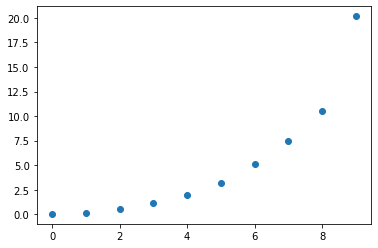

In [56]:
plt.scatter(range(0,10), tiempo)

[[  0 457 473 346 350 474 582 376 307 413]
 [457   0 144 198 587  21 147 207 166 238]
 [473 144   0 313 678 158 137 117 173 119]
 [346 198 313   0 392 202 344 309 196 355]
 [350 587 678 392   0 593 734 626 514 673]
 [474  21 158 202 593   0 143 227 185 256]
 [582 147 137 344 734 143   0 252 275 255]
 [376 207 117 309 626 227 252   0 118  48]
 [307 166 173 196 514 185 275 118   0 166]
 [413 238 119 355 673 256 255  48 166   0]]
